# Функции в Pandas
Примеры из презентации

# Домашнее задание

# Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class



In [74]:
import pandas as pd

data = pd.read_csv('movies.csv')
data2 = pd.read_csv('ratings.csv')
joined = data2.merge(data, on='movieId', how='left')
df = joined[['movieId', 'title', 'rating', 'timestamp']]
#df['rating'].head()
#def classific(row):
 #   if x <= 2.0:
  #      return 'bad'
   # elif x <=4.0:
    #    return 'average'
    #else:
     #   return 'high'

    
    #map(multiply2, [1, 2, 3, 4])
#row = lambda x: 'bad' if x <= 2.0 else ('average' if x <= 4.0 else 'high')
#df['class'] = df['rating'].map(classific)
df['classis'] = df['rating'].apply(lambda x: 'bad' if x <= 2.0 else ('average' if x <= 4.0 else 'high'))
df.head()
#df1.loc[:,'f']

#df['x'] = df['rating'].apply(f)
#df['classific'] = df.apply(classific, axis=1)


/Users/natalaurina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,movieId,title,rating,timestamp,classis
0,31,Dangerous Minds (1995),2.5,1260759144,average
1,1029,Dumbo (1941),3.0,1260759179,average
2,1061,Sleepers (1996),3.0,1260759182,average
3,1129,Escape from New York (1981),2.0,1260759185,bad
4,1172,Cinema Paradiso (Nuovo cinema Paradiso) (1989),4.0,1260759205,average


# Задание 2



Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

In [ ]:
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}


Результат классификации запишите в отдельный столбец region.

In [16]:
import pandas as pd
import re


def get_region(s):
    for region, keywords in geo_data.items():
        for keyword in keywords:
            if re.match(f'.*\W{keyword}.*', f' {s}'):
                return region
    return 'undefined'


data = pd.read_csv('keywords.csv')
geo_data = {
'Центр': ['моск', 'тул', 'ярославл'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}
data['region'] = data['keyword'].map(get_region)
data.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


# Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:
В переменную years запишите список из всех годов с 1950 по 2010.
Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’
Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [85]:
import pandas as pd
import re
import matplotlib.pyplot as plt


ratings = pd.read_csv('ratings.csv')
ratings = ratings.groupby(by='movieId')['rating'].mean().to_frame()
movies = pd.read_csv('movies.csv')
movies['year'] = movies['title'].map(lambda x: re.findall(r'\((\d{4})', x))
movies['year'] = movies['year'].map(lambda x: 1900 if len(x) == 0 else int(x[0]))
rating_for_year = ratings.merge(movies, left_index=True, right_on='movieId')[['rating', 'year']]
a = rating_for_year.groupby(by='year')['rating'].mean()
a.columns = ['year', 'rating_for_year']
rating_for_year.sort_values('rating', ascending=False).head()

,rating,year
7148,5.0,2003
3521,5.0,1976
5132,5.0,1997
11267,5.0,1946
19130,5.0,1953


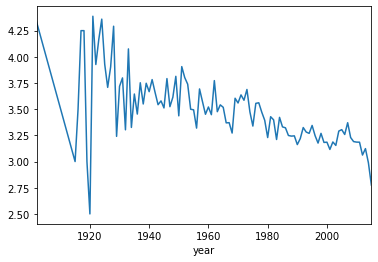

In [13]:
rating_for_year.plot()